<a href="https://colab.research.google.com/github/bhanu-50/Jamboree_Education_Case_Study/blob/main/Jamboree_Education_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About Jamboree**

Jamboree has helped thousands of students make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.

They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

# **Business Aim of the Case study :**

1.    Understanding what factors are important in graduate admissions and how these factors are interrelated among themselves.
2.  It will also help predict one's chances of admission given the rest of the variables.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
#Downloading dataset
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
To: /content/Jamboree_Admission.csv
100% 16.2k/16.2k [00:00<00:00, 32.0MB/s]


# Exploratory Data Analysis

## *Observations on shape of data, data types of all the attributes, statistical summary*

In [60]:
df = pd.read_csv("/content/Jamboree_Admission.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [61]:
df.shape

(500, 9)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [63]:
df.isnull().sum()/len(df)*100
#No null value

,0
Serial No.,0.0
GRE Score,0.0
TOEFL Score,0.0
University Rating,0.0
SOP,0.0
LOR,0.0
CGPA,0.0
Research,0.0
Chance of Admit,0.0


Given data set have only int and float data types and didnt have any Null values.

In [64]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [65]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [66]:
df["University Rating"].value_counts(normalize=True)*100

,proportion
University Rating,
3,32.4
2,25.2
4,21.0
5,14.6
1,6.8


In [67]:
df["Research"].value_counts(normalize=True)*100

,proportion
Research,
1,56.0
0,44.0


In [68]:
df["SOP"].value_counts(normalize=True)*100

,proportion
SOP,
4.0,17.8
3.5,17.6
3.0,16.0
2.5,12.8
4.5,12.6
2.0,8.6
5.0,8.4
1.5,5.0
1.0,1.2


In [69]:
df["LOR "].value_counts(normalize=True)*100

,proportion
LOR,
3.0,19.8
4.0,18.8
3.5,17.2
4.5,12.6
2.5,10.0
5.0,10.0
2.0,9.2
1.5,2.2
1.0,0.2


In [70]:
df["Chance of Admit "].value_counts(normalize=True)

,proportion
Chance of Admit,
0.71,0.046
0.64,0.038
0.73,0.036
0.72,0.032
0.79,0.032
...,...
0.60,0.004
0.51,0.004
0.43,0.002


Dropping Serial no. column as we don't want our model to develop any understanding using it's values.

In [71]:
df.drop(columns = ["Serial No."], inplace= True)

In [72]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [73]:
df["University Rating"].value_counts()

,count
University Rating,
3,162
2,126
4,105
5,73
1,34


## **Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)**

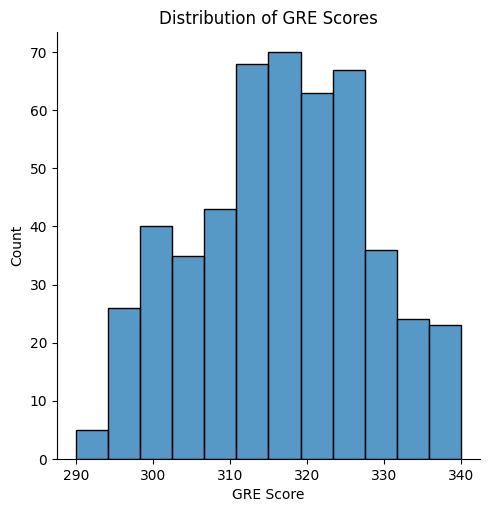

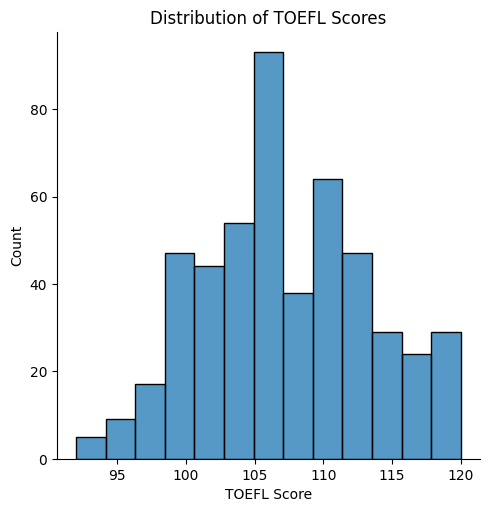

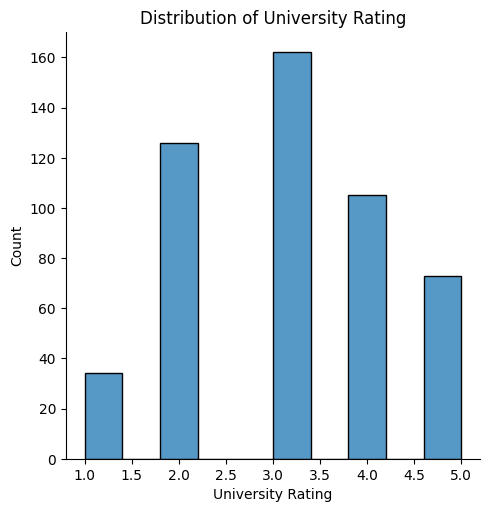

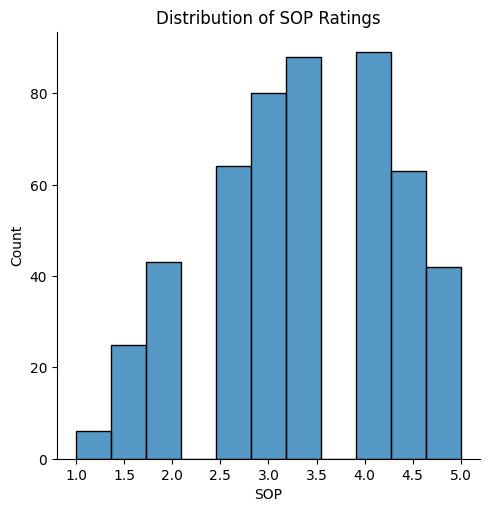

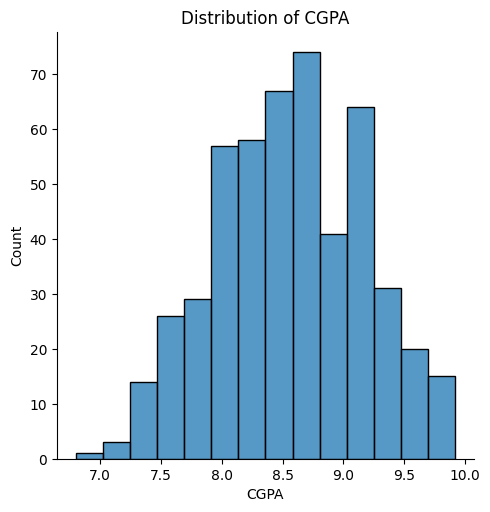

In [74]:
fig = sns.displot(df['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

fig = sns.displot(df['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

fig = sns.displot(df['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()

fig = sns.displot(df['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

fig = sns.displot(df['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()

plt.show()

It is clear from the distributions, students with varied merit apply for the university.


**Understanding the relation between different factors responsible for graduate admissions**

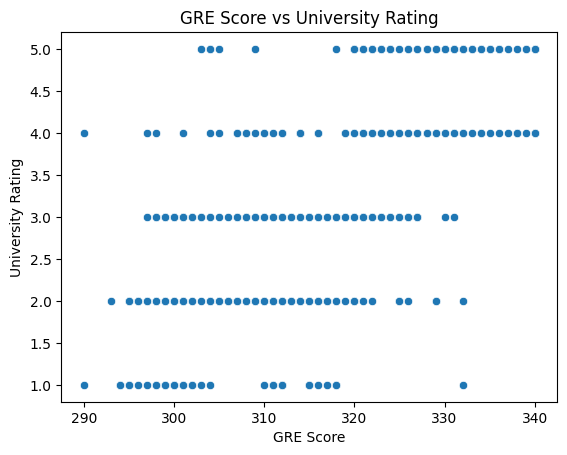

In [75]:
sns.scatterplot(x="GRE Score", y="University Rating", data=df)
plt.title("GRE Score vs University Rating")
plt.show()


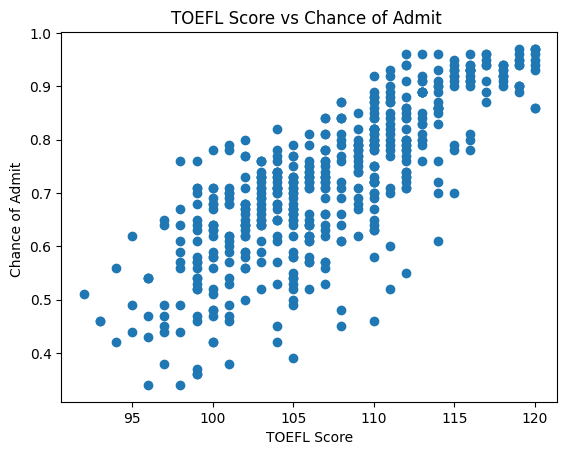

In [76]:
plt.scatter(x = df["TOEFL Score"], y = df["Chance of Admit "])
plt.xlabel("TOEFL Score")
plt.ylabel("Chance of Admit ")
plt.title("TOEFL Score vs Chance of Admit ")
plt.show()


The above graph clearly demonstartes that Higher Ranking Unviersities are having students with High GRE scores. The chances of admission also can be clearly seen here.

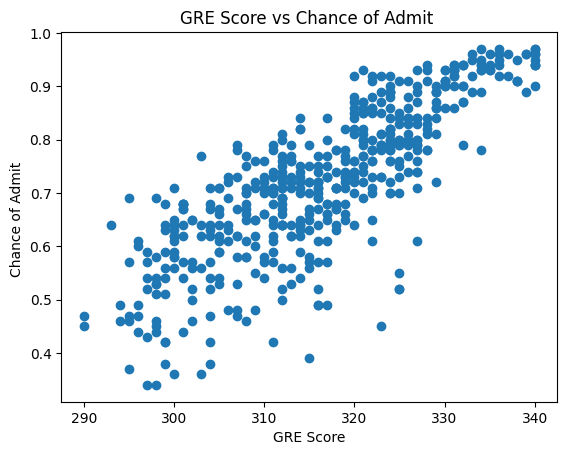

In [77]:
plt.scatter(x = df["GRE Score"], y = df["Chance of Admit "])
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit ")
plt.title("GRE Score vs Chance of Admit ")
plt.show()

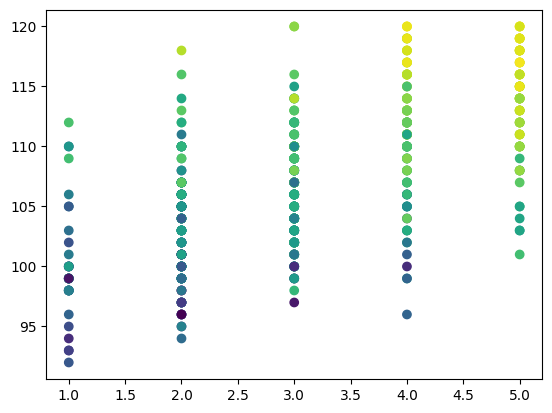

In [78]:
plt.scatter(x = df["University Rating"], y = df["TOEFL Score"], c = df["Chance of Admit "])


 The Higher Ranking Unviersities prefered students with High TOEFL scores. The chances of admission also can be clearly seen here.

The insight looks similar to GRE scores.

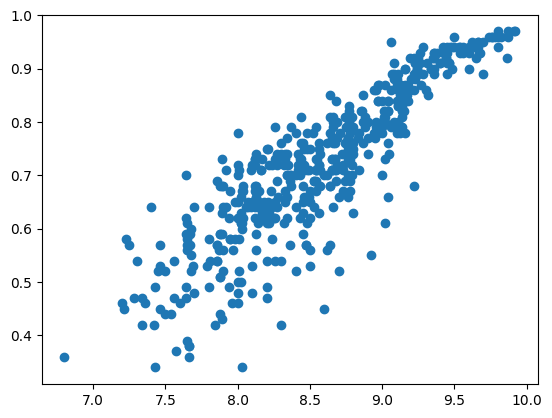

In [79]:
plt.scatter(x = df["CGPA"], y = df["Chance of Admit "])


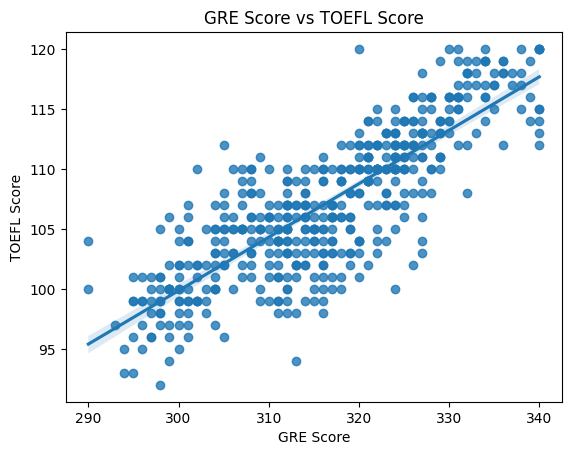

In [80]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

People with higher GRE Scores also have higher TOEFL Scores which is justified because both TOEFL and GRE have a verbal section which although not similar are relatable

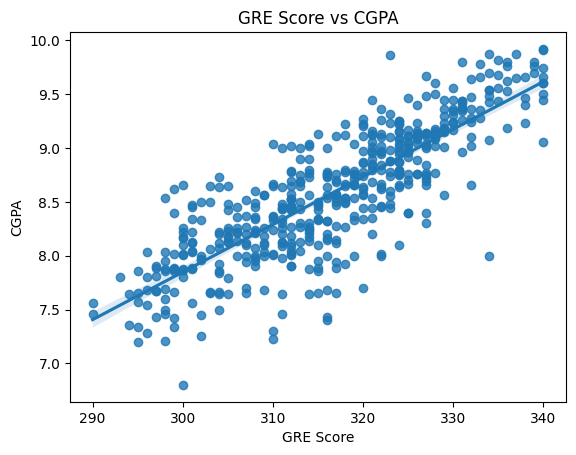

In [81]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

Although there are exceptions, people with higher CGPA usually have higher GRE scores maybe because they are smart or hard working

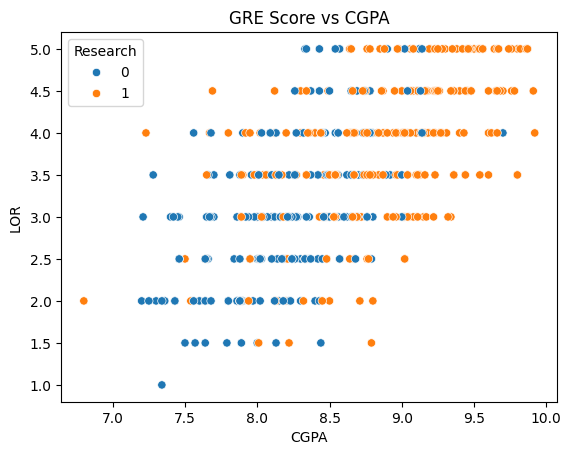

In [82]:
fig = sns.scatterplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

LORs are not that related with CGPA so it is clear that a persons LOR is not dependent on that persons academic excellence. Having research experience is usually related with a good LOR which might be justified by the fact that supervisors have personal interaction with the students performing research which usually results in good LORs

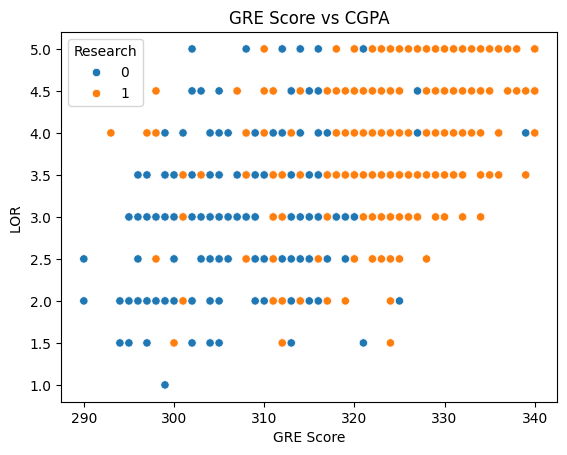

In [83]:
fig = sns.scatterplot(x="GRE Score", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

GRE scores and LORs are also not that related. People with different kinds of LORs have all kinds of GRE scores

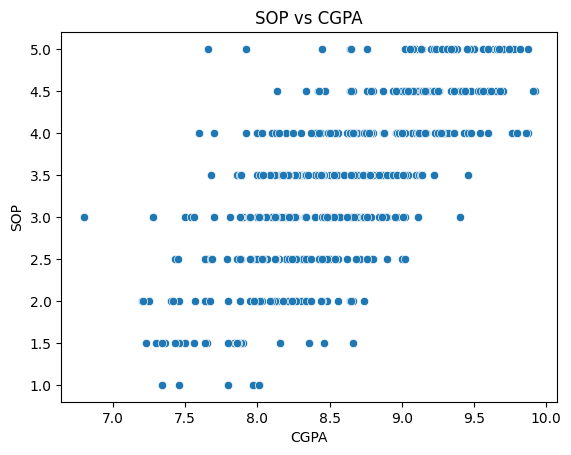

In [84]:
fig = sns.scatterplot(x="CGPA", y="SOP", data=df)
plt.title("SOP vs CGPA")
plt.show()

CGPA and SOP are not that related because Statement of Purpose is related to academic performance, but since people with good CGPA tend to be more hard working so they have good things to say in their SOP which might explain the slight  move towards higher CGPA as along with good SOPs

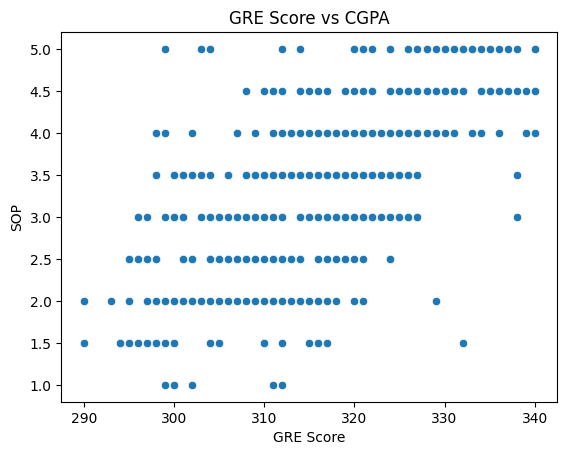

In [85]:
fig = sns.scatterplot(x="GRE Score", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

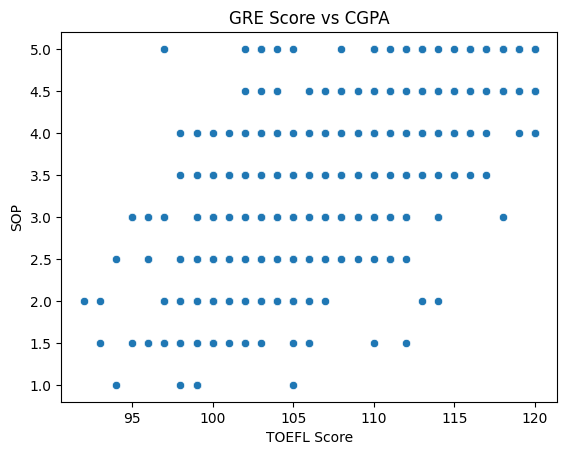

In [86]:
fig = sns.scatterplot(x="TOEFL Score", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

Applicants with different kinds of SOP have different kinds of TOEFL Score. So the quality of SOP is not always related to the applicants English skills.



The Plot between CGPA and Chance of Admit shows that students having Higher CGPA have a high chance of getting admission to dollowing university.

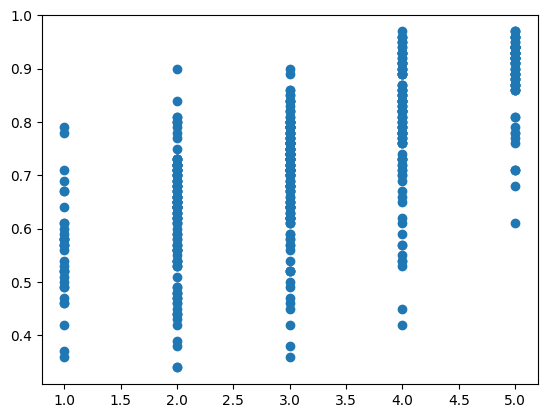

In [87]:
plt.scatter(x = df["University Rating"], y = df["Chance of Admit "])


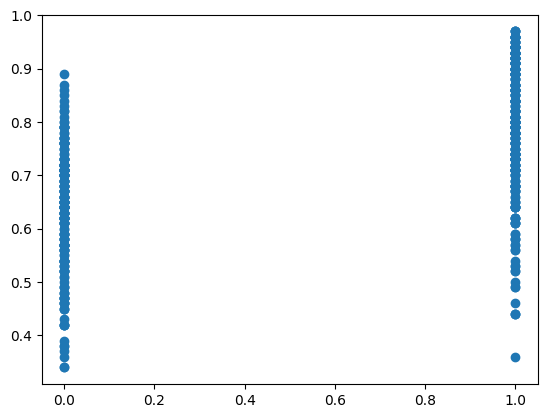

In [88]:
plt.scatter(x = df["Research"], y = df["Chance of Admit "])


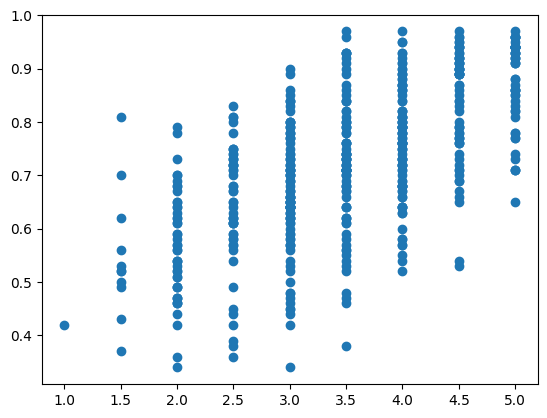

In [89]:
plt.scatter(x = df["LOR "], y = df["Chance of Admit "])


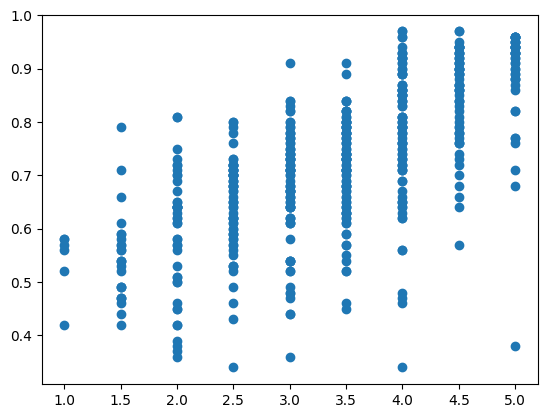

In [90]:
plt.scatter(x = df["SOP"], y = df["Chance of Admit "])


In [91]:
df.corr()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


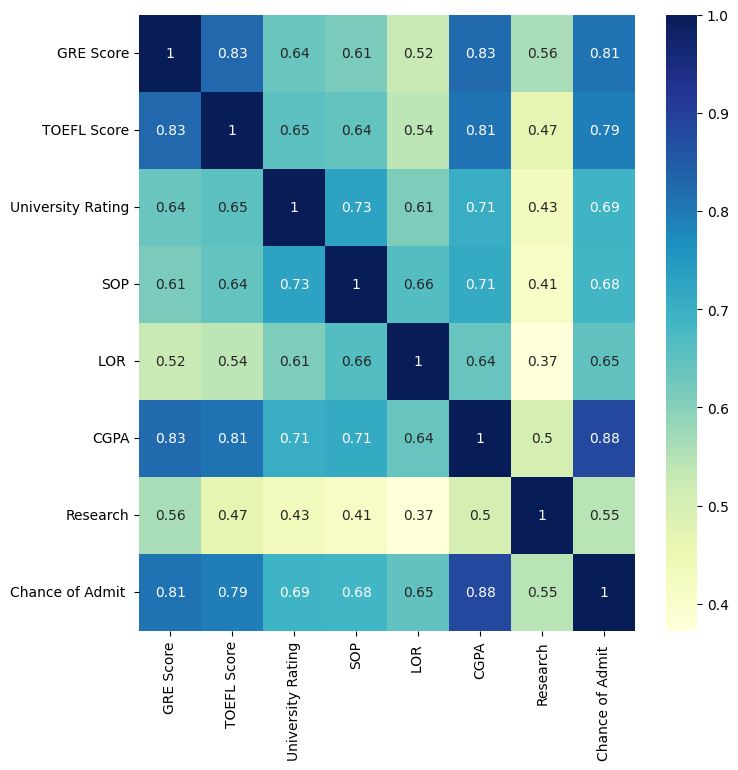

In [92]:
fig, ax = plt.subplots(figsize=(8,8))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


1. There is a high correlation between GRE Score, TOEFL Score and Chance of Admit
2. There is a some correlation between University Rating, SOP, LOR and Chance of Admit
4. There is a very high correlation between CGPA and Chance of Admit
5. Research column has least effect in comparision to all others on Chances of Admission

# **Data Preprocessing & Model Building**

In [93]:
import statsmodels.api as sm

In [94]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


Dividing the given data in 2 parts -

**X - Features including Columns (GRE_score, TOFEL score etc.)**

**Y - Target as (Chance of Admit) :**


In [95]:
y=df[['Chance of Admit ']]
X=df.drop('Chance of Admit ', axis=1)

Lets split the dataset with training and testing set and prepare the inputs and outputs:
Dividing the data into Training (70%) and Testing(30%) data.

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

In [97]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
230,313,104,3,4.0,4.5,8.65,0
76,327,112,3,3.0,3.0,8.72,1
298,330,114,3,4.5,4.5,9.24,1
147,326,114,3,3.0,3.0,9.11,1
253,335,115,4,4.5,4.5,9.68,1
...,...,...,...,...,...,...,...
416,315,104,3,4.0,2.5,8.10,0
374,315,105,2,2.0,2.5,7.65,0
144,325,112,2,3.0,3.5,8.96,1
224,305,105,2,3.0,2.0,8.23,0


In [98]:
y_train

,Chance of Admit
230,0.73
76,0.74
298,0.90
147,0.83
253,0.93
...,...
416,0.65
374,0.39
144,0.80
224,0.67


In [99]:
#Standardization
from sklearn.preprocessing import StandardScaler
X_train_columns=X_train.columns
std=StandardScaler()
X_train_std=std.fit_transform(X_train)


In [100]:
X_train_std

array([[-0.31899395, -0.52946062, -0.12089372, ...,  1.07059831,
         0.11225823, -1.13967126],
       [ 0.89953683,  0.7859695 , -0.12089372, ..., -0.56390292,
         0.22803099,  0.87744601],
       [ 1.16065057,  1.11482703, -0.12089372, ...,  1.07059831,
         1.08805721,  0.87744601],
       ...,
       [ 0.72546101,  0.7859695 , -1.00012078, ..., -0.01906918,
         0.62496617,  0.87744601],
       [-1.01529726, -0.36503186, -1.00012078, ..., -1.65357041,
        -0.58237833, -1.13967126],
       [-0.40603186, -0.69388939, -0.12089372, ...,  0.52576456,
        -0.21852109, -1.13967126]])

In [101]:
X_train=pd.DataFrame(X_train_std, columns=X_train_columns)

In [102]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-0.318994,-0.529461,-0.120894,0.611974,1.070598,0.112258,-1.139671
1,0.899537,0.785969,-0.120894,-0.407983,-0.563903,0.228031,0.877446
2,1.160651,1.114827,-0.120894,1.121953,1.070598,1.088057,0.877446
3,0.812499,1.114827,-0.120894,-0.407983,-0.563903,0.873051,0.877446
4,1.595840,1.279256,0.758333,1.121953,1.070598,1.815772,0.877446
...,...,...,...,...,...,...,...
395,-0.144918,-0.529461,-0.120894,0.611974,-1.108737,-0.797385,-1.139671
396,-0.144918,-0.365032,-1.000121,-1.427940,-1.108737,-1.541638,-1.139671
397,0.725461,0.785969,-1.000121,-0.407983,-0.019069,0.624966,0.877446
398,-1.015297,-0.365032,-1.000121,-0.407983,-1.653570,-0.582378,-1.139671


**Let's train our model using StatsModel library**
Lets use a bunch of different algorithms to see which model performs bette

In [103]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error

models = [
           ['Linear Regression :', LinearRegression()],

          ['Lasso Regression :', Lasso(alpha=0.1)], #try with different alpha values
          ['Ridge Regression :', Ridge(alpha=1.0)] #try with different alpha values
          ]

print("Results without removing features with multicollinearity ...")


for name,model in models:
    model.fit(X_train, y_train.values)
    predictions = model.predict(std.transform(X_test))
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

    #ADD MAPE

Results without removing features with multicollinearity ...
Linear Regression : 0.06708572915080953
Lasso Regression : 0.1258669955620955
Ridge Regression : 0.06707932470998834


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


 **Terms involved in the LR & Fitting the Model:**

- Dep. Variable: This column displays the name of the dependent variable being predicted in the regression. (y in our case)

- Model: It provides a concise representation of the model type and method used, such as "OLS" (Ordinary Least Squares).

- R-squared: Represents the coefficient of determination (R-squared) value.

- Adj. R-squared: This is the adjusted R-squared value, which accounts for the number of predictors in the model and adjusts the R-squared accordingly.
- Adjusted. R-squared reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.

- const coefficient is your Y-intercept. It means that if both the Interest_Rate and Unemployment_Rate coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.

- std err reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy.

- P >|t| is your p-value. A p-value of less than 0.05 is considered to be statistically significant.

- Confidence Interval represents the range in which our coefficients are likely to fall (with a likelihood of 95%)




In [104]:
# Statmodels implementation of Linear regression
import statsmodels.api as sm
Xm_train = sm.add_constant(X_train)
model = sm.OLS(y_train.values, Xm_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     274.9
Date:                Sat, 14 Jun 2025   Prob (F-statistic):          6.33e-147
Time:                        06:48:43   Log-Likelihood:                 574.90
No. Observations:                 400   AIC:                            -1134.
Df Residuals:                     392   BIC:                            -1102.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7236      0.00

In [105]:
Xm_train

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.0,-0.318994,-0.529461,-0.120894,0.611974,1.070598,0.112258,-1.139671
1,1.0,0.899537,0.785969,-0.120894,-0.407983,-0.563903,0.228031,0.877446
2,1.0,1.160651,1.114827,-0.120894,1.121953,1.070598,1.088057,0.877446
3,1.0,0.812499,1.114827,-0.120894,-0.407983,-0.563903,0.873051,0.877446
4,1.0,1.595840,1.279256,0.758333,1.121953,1.070598,1.815772,0.877446
...,...,...,...,...,...,...,...,...
395,1.0,-0.144918,-0.529461,-0.120894,0.611974,-1.108737,-0.797385,-1.139671
396,1.0,-0.144918,-0.365032,-1.000121,-1.427940,-1.108737,-1.541638,-1.139671
397,1.0,0.725461,0.785969,-1.000121,-0.407983,-0.019069,0.624966,0.877446
398,1.0,-1.015297,-0.365032,-1.000121,-0.407983,-1.653570,-0.582378,-1.139671


In [106]:
Xm_train_new=Xm_train.drop(columns='SOP')
model1 = sm.OLS(y_train.values, Xm_train_new).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     321.5
Date:                Sat, 14 Jun 2025   Prob (F-statistic):          3.39e-148
Time:                        06:48:43   Log-Likelihood:                 574.90
No. Observations:                 400   AIC:                            -1136.
Df Residuals:                     393   BIC:                            -1108.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7236      0.00

**The advantage of using StatsModel is that it is providing us with the R squared and adjusted R squared values directly:**

1. As we see in Model1, where we drop "SOP" feature column we see clear difference between R squared and Adj. R squared values, among the models
*model*
(R-squared:0.0.836; Adj. R-squared:0.833)

*Model1*
(R-squared:0.836; Adj. R-squared:0.833)






# Testing the assumptions of the linear regression model





*Linear regression, a fundamental statistical method for modeling the
relationship between a dependent variable and one or more independent variables, relies on several key assumptions.*

*We can prove that Linear regression is a very good model if all the statistical assumptions holds true.*



**Assumptions of Linear Regression**



1. Linearity: The relationship between the independent variables and the
dependent variable is linear. This means the change in the dependent variable due to a one-unit change in an independent variable is constant.

2. Independence: Observations are independent of each other. This is crucial for the reliability of the statistical inferences made from the model.

3. Homoscedasticity: The variance of residual errors is constant across all
levels of the independent variables. If the variance change (heteroscedasticity), it can lead to inefficient estimates.

4. Normal Distribution of Errors: The residuals (errors) of the model are
normally distributed. This assumption facilitates the creation of confidence
intervals and hypothesis tests.

5. No or Little Multicollinearity: Independent variables should not be too
highly correlated with each other. High correlation can make it difficult to
isolate the effect of each independent variable on the dependent variable.
Let's check them one by one.

It is important to Scale the data, so using **STANDARD SCALER** for it.

## **Multicollinearity Check and VIF (Variance Inflation Factor)**
- VIF score of an independent variable represents how well the variable is explained by other independent variables.

- When one or more input variables exhibhit strong correlation and One variable is enough to be part of the model.

- So, the closer the R^2 value to 1, the higher the value of VIF and the higher the multicollinearity with the particular independent variable.



In [107]:
# VIF(Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataset,col):
  dataset=dataset.drop(columns=col,axis=1)
  vif=pd.DataFrame()
  vif['features']=dataset.columns
  vif['VIF_Value']=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
  return vif

In [108]:
calculate_vif(Xm_train_new,[])

,features,VIF_Value
0,const,1.000000
1,GRE Score,4.603480
2,TOEFL Score,3.858091
3,University Rating,2.259181
4,LOR,1.825321
5,CGPA,4.678340
6,Research,1.549913


The VIF values given by model are less than 5 which symbolizes **LOW MULTICOLLINEARITY**.

Linear regression model works well in such scenario. No need of removing/dropping any feature.

Let's check the next assumption.

##  Normal Distribution of Errors:

In [109]:
y_train_Array = np.array(y_train)

In [110]:
X = df[df.columns.drop('Chance of Admit ')]
y = df["Chance of Admit "]

X_train, X_test, y_train_Array, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)
X_sm = sm.add_constant(X_tr_scaled)
sm_model = sm.OLS(y_train_Array, X_sm).fit()

In [111]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train_Array

Text(0.5, 1.0, 'Histogram of residuals')

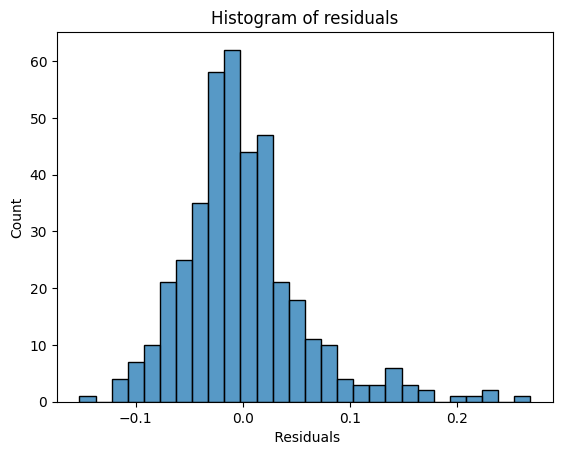

In [112]:
sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

In [113]:
from scipy import stats
res = stats.shapiro(errors)
res.statistic

np.float64(0.9314318654549095)

In [114]:
res

ShapiroResult(statistic=np.float64(0.9314318654549095), pvalue=np.float64(1.3679305929635677e-12))

Closer the value to 1, more is the normality.

In this case, a value of 0.93 denotes a high level of normality for the error distribuiton

- If the distribution of errors is gaussian distribution then the assumption of error being normally distributed is being sastified (sanity check)



4. Heteroskadestacity shouldn't exist



In [115]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train_Array

Text(0.5, 1.0, "'Residuals vs fitted values plot for homoscedasticity check")

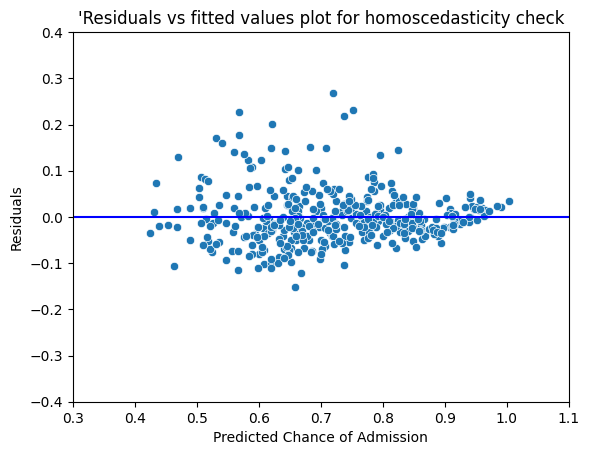

In [116]:
sns.scatterplot(x=Y_hat,y=errors)
plt.xlabel("Predicted Chance of Admission")
plt.ylabel("Residuals")
plt.ylim(-0.4,0.4)
plt.xlim(0.3,1.1)
p = sns.lineplot(x=[0,26], y=[0,0], color='blue')
plt.title("'Residuals vs fitted values plot for homoscedasticity check")

In [117]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity -
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train_Array,X_sm )
lzip(name, test)

[('F statistic', np.float64(1.0772994279987236)),
 ('p-value', np.float64(0.3032327647981612))]

From the goldfeld-quandt test:
- F Statistic comes out to be 1.0772 => Implying minimal difference in variance between groups
- p-value of 0.3032 indicates that this difference is  statistically significant at conventional levels of significance (e.g., 0.05).

Therefore, we accept the null hypothesis of homoscedasticity, and conclude that there is no strong evidence of heteroscedasticity in the data.

# **Applying Lasso & Ridge regularization**

In [118]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [119]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
# Transform the features into polynomial features
degree = 5
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [121]:
# Standardize the polynomial features
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

In [122]:
model = LinearRegression()
model.fit(X_train_poly_scaled , y_train)

output = model.predict(X_test_poly_scaled)


taking MSE as metric instead of Adj.R-sq

In [123]:
from sklearn.metrics import mean_squared_error

print('MSE for test:', mean_squared_error(y_test, output))

output = model.predict(X_train_poly_scaled)
print('MSE for train:', mean_squared_error(y_train, output))

MSE for test: 6.752280974291499
MSE for train: 4.957839729678724e-22


Clearly degree = 5 overfits in the model, increasing the MSE.

In [124]:
lasso_model = Lasso(alpha=0.01)  # Alpha is the regularization strength
ridge_model = Ridge(alpha=1.0)    # Alpha is the regularization strength

In [125]:
# Fit the models to the training data
lasso_model.fit(X_train_poly_scaled, y_train)
ridge_model.fit(X_train_poly_scaled, y_train)

Ridge()

In [126]:
lasso_predictions = lasso_model.predict(X_train_poly_scaled)
ridge_predictions = ridge_model.predict(X_train_poly_scaled)

print('test MSE for L1:', mean_squared_error(y_train, lasso_predictions))
print('test MSE for L2:', mean_squared_error(y_train, ridge_predictions))

test MSE for L1: 0.0036923994575747588
test MSE for L2: 0.0030771485977502612


In [127]:
lasso_predictions = lasso_model.predict(X_test_poly_scaled)
ridge_predictions = ridge_model.predict(X_test_poly_scaled)

print('test MSE for L1:', mean_squared_error(y_test, lasso_predictions))
print('test MSE for L2:', mean_squared_error(y_test, ridge_predictions))

test MSE for L1: 0.0037294101004085502
test MSE for L2: 0.0037841315629938417


Clearly the MSE values have been reduced drastically by applying L1(Lasso) and L2(Ridge) regularization methods.

#  **CONCLUSION**

We can say that provided data can be modeled using Linear Regression model.

The data provided has no unwanted features so we can use all of those for the prediction of their impact on the Chances of getting admission.

1. Students having high GRE Score and TOEFL Score have high chances of getting admission in Unviersities with high rating.
2. Students secring high CGPA have very high chance of admission.
3. Research is not a very important feature to get admission.






# **RECOMMENDATIONS**

1. Students looking for Admission in the Ivy league colleges should aim for high TOEFL, GRE and CGPA.
2. Universities can be identified by looking at their ratings.
3. Jamboree can use the above analysis to mention on their website the important factors for admission in Ivy league colleges.
4. Jamboree can help the students improve TOEFL, GRE and CGPA score of the students by introducing practice papers, mock test, etc.